## INFO212 Assignment2 T22

In [84]:
# altair installation
# !pip install "altair[all]"
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 445.2 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 550.5 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 573.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 711.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 711.9 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 737.3 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 737.3 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 628.1 kB/s eta 0:00:01
   --------------

In [85]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
import altair as alt

### Data Collection  
Request:  
- Download JSON data files containing economic indicators from reputable sources (e.g. such as the World Bank or IMF).  
- Ensure the data spans at least 5 years for multiple countries. 

In [67]:
# 定义查询的国家和指标
countries = ["CN", "BR", "JP", "CA", "NP"]
indicators = {
    "GDP": "NY.GDP.MKTP.CD",
    "Unemployment": "SL.UEM.TOTL.ZS",
    "Inflation": "FP.CPI.TOTL",
    "Tariff rate": "TM.TAX.MANF.SM.AR.ZS",
    "GDP growth": "NY.GDP.MKTP.KD.ZG"
}
years = range(1980, 2019 + 1)
base_url = "http://api.worldbank.org/v2/country/{}/indicator/{}?date={}:{}&format=json&per_page=100"

# 获取数据并合并成一个JSON文件
data = {}
for indicator_name, indicator_code in indicators.items():
    data[indicator_name] = {}
    for country in countries:
        response = requests.get(base_url.format(country, indicator_code, years[0], years[-1]))
        if response.status_code == 200:
            result = response.json()
            if len(result) > 1:
                data[indicator_name][country] = result[1]
        else:
            print(f"Error fetching data for {country} - {indicator_name}: {response.status_code}")

# 保存数据到JSON文件
with open("world_bank_data.json", "w") as f:
    json.dump(data, f, indent=4)

print("Data has been saved to world_bank_data.json")


Data has been saved to world_bank_data.json


## Data Preparation  
Request:  
- If required, load the JSON files into Pandas DataFrames.     
- Clean the data by handling missing values, duplicates, and incorrect data 
types. 

In [68]:

# 国家名称映射字典
country_names = {"CN": "China", "BR": "Brazil", "JP": "Japan", "CA": "Canada", "NP": "Nepal"}

def create_indicator_dataframe(data, indicator):
    records = [(country_names[country_code], int(entry['date']), entry['value']) for country_code, values in data[indicator].items() for entry in values]
    df = pd.DataFrame(records, columns=['country', 'date', indicator])
    df_pivot = df.pivot(index='date', columns='country', values=indicator)
    clear_Nan(df_pivot)
    return df_pivot



def clear_Nan(df,value=0):
    Nan_mask = df.isna()
    df[Nan_mask] = value
    return Nan_mask

In [80]:
# 创建GDP、Unemployment、Inflation的DataFrame
gdp_df = create_indicator_dataframe(data, "GDP")
unemployment_df = create_indicator_dataframe(data, "Unemployment")
inflation_df = create_indicator_dataframe(data, "Inflation")
tariff_df = create_indicator_dataframe(data, "Tariff rate")
gdp_growth_df = create_indicator_dataframe(data, "GDP growth")

dfs = {
    "GDP":gdp_df,
    "Unemployment":unemployment_df,
    "Inflation":inflation_df,
    "Tariff rate":tariff_df,
    "GDP growth":gdp_growth_df,
}
# 显示DataFrame
for (name,df) in dfs.items():
    print(f'{name} DataFrame:')
    print(df)
    print()

GDP DataFrame:
country        Brazil        Canada         China         Japan         Nepal
date                                                                         
1980     0.000000e+00  2.747766e+11  3.061653e+11  1.129377e+12  1.945917e+09
1981     0.000000e+00  3.072466e+11  2.895766e+11  1.245221e+12  2.275583e+09
1982     0.000000e+00  3.146478e+11  2.839287e+11  1.158731e+12  2.395424e+09
1983     0.000000e+00  3.418663e+11  3.047489e+11  1.270860e+12  2.447175e+09
1984     0.000000e+00  3.567184e+11  3.137285e+11  1.345825e+12  2.581207e+09
1985     0.000000e+00  3.661860e+11  3.098358e+11  1.427020e+12  2.619914e+09
1986     0.000000e+00  3.790068e+11  3.005142e+11  2.120084e+12  2.850782e+09
1987     0.000000e+00  4.331342e+11  3.270894e+11  2.580748e+12  2.957255e+09
1988     0.000000e+00  5.093800e+11  4.078447e+11  3.125724e+12  3.487010e+09
1989     4.255953e+11  5.672120e+11  4.562891e+11  3.109455e+12  3.525226e+09
1990     4.619518e+11  5.960756e+11  3.945657e+11

## Data Analysis
- Perform exploratory data analysis (EDA) to understand the datasets. 
- Calculate summary statistics and identify trends over time for each 
indicator. 

In [71]:
dfs_summary = {}

for (name,df) in dfs.items():
    print(f'{name}:')
    df_summary = df.describe()
    dfs_summary[name] = df_summary
    print(df_summary)

GDP DataFrame:
country        Brazil        Canada         China         Japan         Nepal
count    4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01
mean     9.504758e+11  9.541446e+11  3.534644e+12  4.070477e+12  1.007195e+10
std      8.400439e+11  5.408111e+11  4.405534e+12  1.469988e+12  9.437549e+09
min      0.000000e+00  2.747766e+11  2.839287e+11  1.129377e+12  1.945917e+09
25%      4.031510e+11  5.760932e+11  4.119928e+11  3.170860e+12  3.515672e+09
50%      6.623688e+11  7.086970e+11  1.152671e+12  4.558346e+12  5.263947e+09
75%      1.720815e+12  1.534243e+12  5.348066e+12  5.000018e+12  1.364190e+10
max      2.616156e+12  1.846597e+12  1.427997e+13  6.272363e+12  3.418618e+10
Unemployment DataFrame:
country     Brazil     Canada      China      Japan      Nepal
count    40.000000  40.000000  40.000000  40.000000  40.000000
mean      6.639525   5.682500   2.864750   2.771250   7.727600
std       4.475284   3.783724   1.907509   1.924971   4.819939
min    

In [87]:
def create_country_dataframe(dfs, country):
    out_df = pd.DataFrame()
    indicators = dfs.keys()

    for df in dfs.values():
        out_df = pd.concat((out_df,df[country]),axis=1) 
    out_df.columns = indicators
    return out_df

country_dfs = {}
for country in country_names.values():
    country_dfs[country] = create_country_dataframe(dfs,country)

df_corrs = {}
for (name,df) in country_dfs.items():
    print(f'{name}:')
    df_corr = df.corr()
    df_corrs[name] = df_corr
    print(df_corr)

China:
                   GDP  Unemployment  Inflation  Tariff rate  GDP growth
GDP           1.000000      0.629564   0.760270    -0.120913   -0.388229
Unemployment  0.629564      1.000000   0.935987     0.317299   -0.049736
Inflation     0.760270      0.935987   1.000000     0.215172   -0.251328
Tariff rate  -0.120913      0.317299   0.215172     1.000000    0.365621
GDP growth   -0.388229     -0.049736  -0.251328     0.365621    1.000000
Brazil:
                   GDP  Unemployment  Inflation  Tariff rate  GDP growth
GDP           1.000000      0.599195   0.892347     0.247935   -0.067212
Unemployment  0.599195      1.000000   0.755121     0.320915   -0.047503
Inflation     0.892347      0.755121   1.000000     0.130586   -0.131907
Tariff rate   0.247935      0.320915   0.130586     1.000000   -0.206189
GDP growth   -0.067212     -0.047503  -0.131907    -0.206189    1.000000
Japan:
                   GDP  Unemployment  Inflation  Tariff rate  GDP growth
GDP           1.000000      0

## Data Visualization 

- Create visualizations to represent the trends and patterns discovered 
during EDA. 
- Use line plots, bar charts, and scatter plots to compare different 
economic indicators across countries. 
- Employ Seaborn’s advanced features like facet grids or pair plots to 
visualize multi-dimensional data.

Explore data distribution

Explore treads of different indicators across countries

In [120]:
def draw_line_chart(name,df):
    df = df.reset_index()
    long_df = pd.melt(df, id_vars=['date'],var_name='Country', value_name=f'{name}')
    chart = alt.Chart(long_df).mark_line(point=True).encode(
        x='date:O',  # 'date:T' if the year is in datetime format
        y=f'{name}:Q',
        color='Country:N',
        tooltip=['Country', 'date', f'{name}']
    ).properties(
        title=f'{name} of Five Countries',
        width=600,
        height=400
    )
    return chart

charts = [draw_line_chart(name,df)for name,df in dfs.items()]

grid = alt.vconcat(
    alt.hconcat(*charts[:3]), 
    alt.hconcat(*charts[3:])
).resolve_scale(
    x='shared',
    y='shared'
)

grid.display()

alt.VConcatChart(...)

Explore relations between indicators

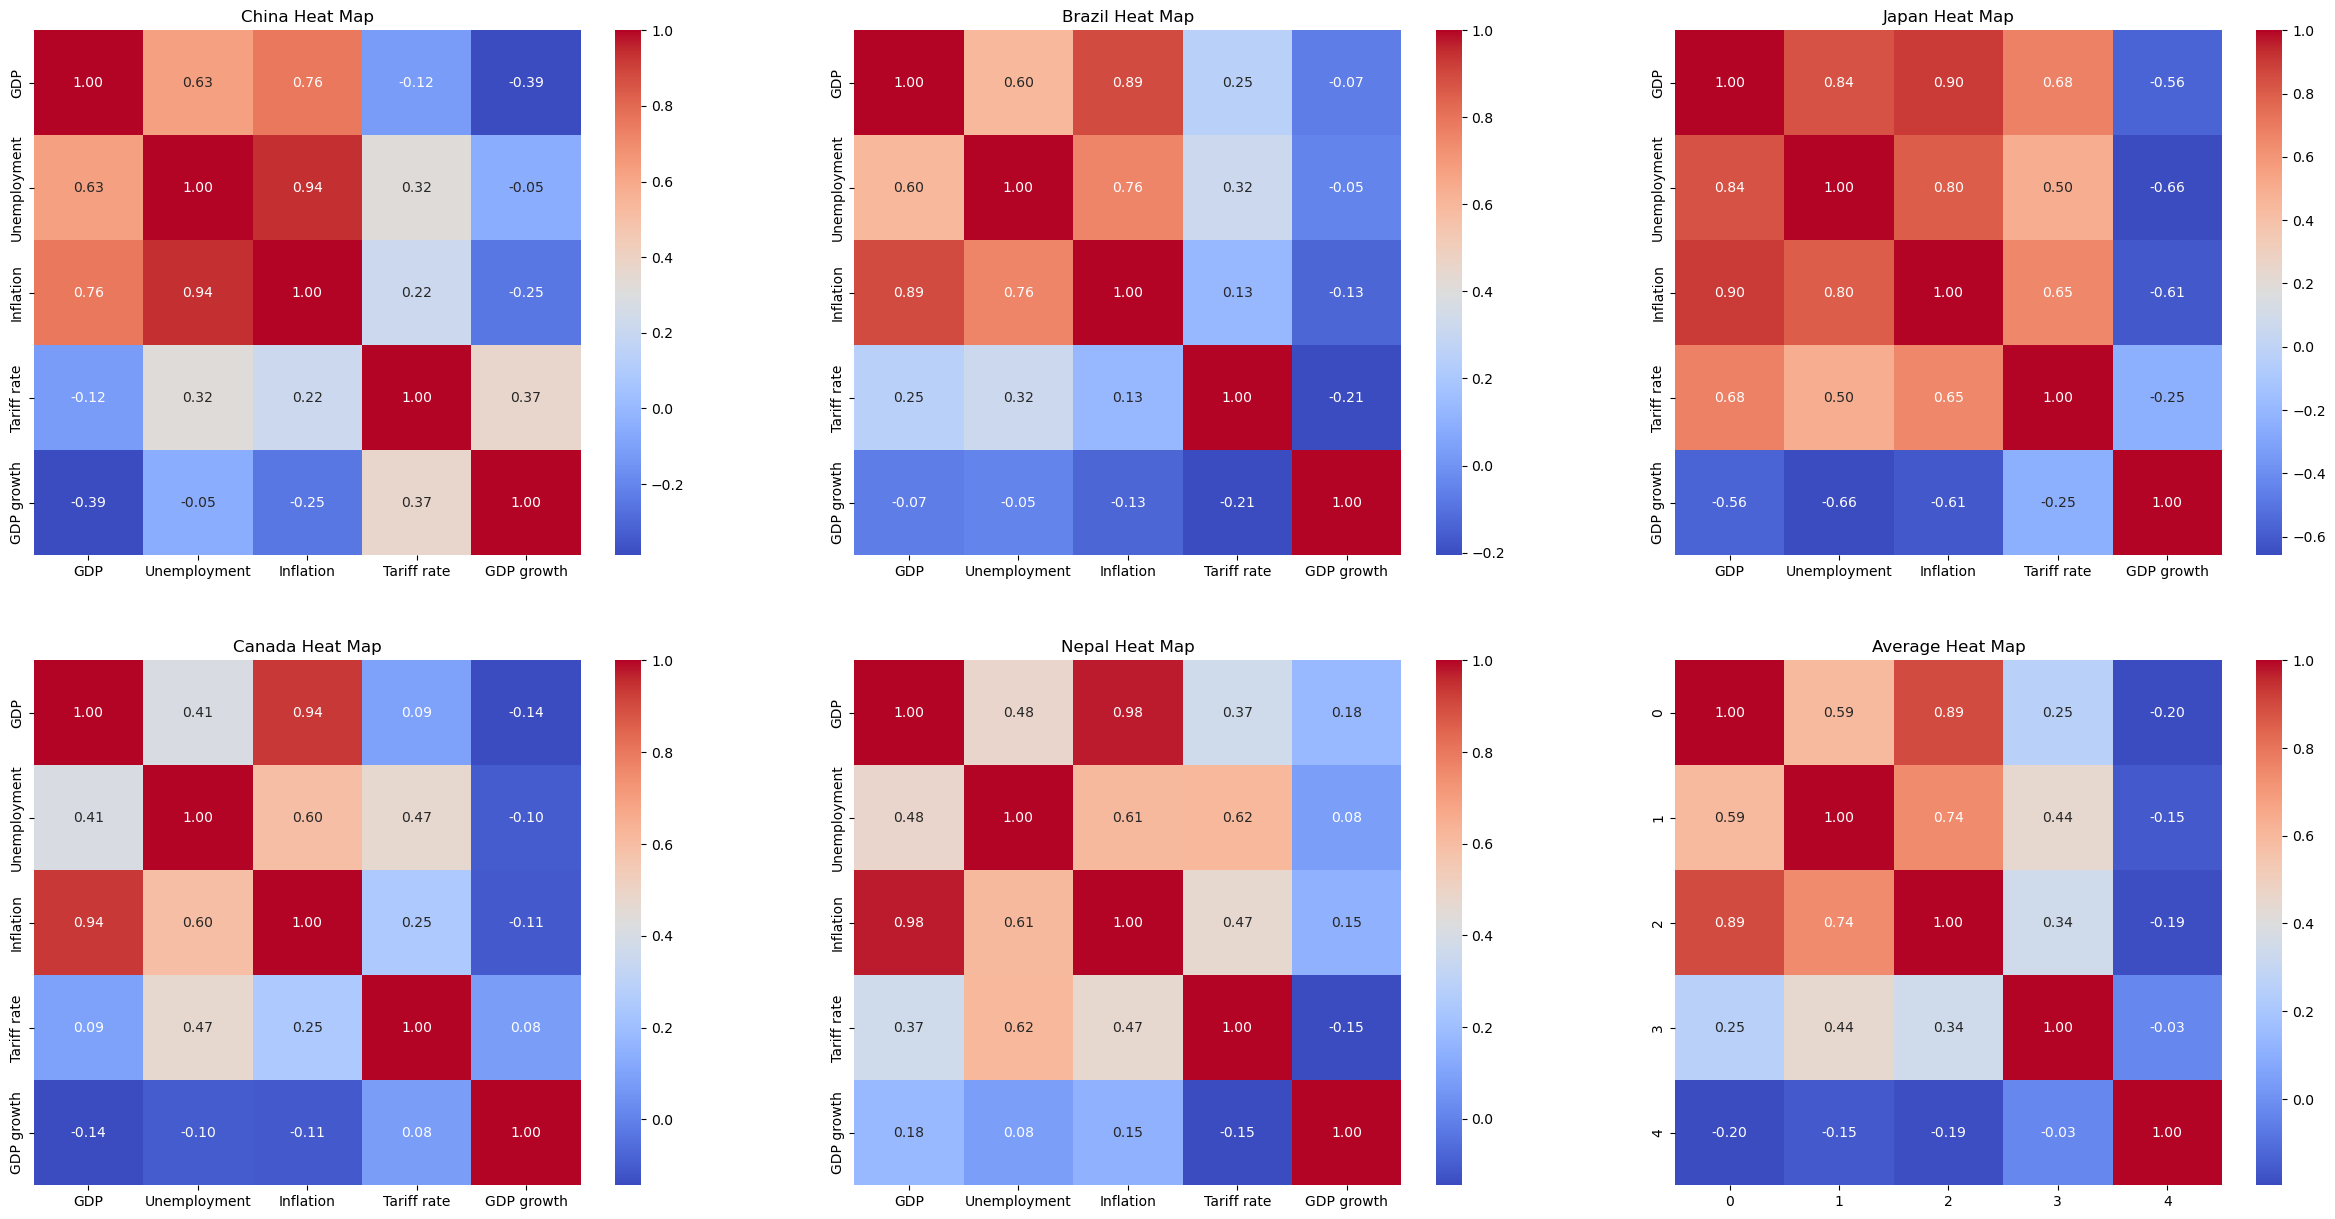

In [121]:
fig, axs = plt.subplots(2, 3, figsize=(30, 15)) 

for (name, df_corr), ax in zip(df_corrs.items(), axs.flatten()):
    sns.heatmap(df_corr, ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
    ax.set_title(f'{name} Heat Map')

# mean_corr_matrix = pd.concat(df_corrs.values()).groupby(level=0).mean()
mean_corr_matrix = np.mean([df_corr.values for df_corr in df_corrs.values()], axis=0)
sns.heatmap(mean_corr_matrix, ax=axs[-1][-1], cmap='coolwarm', annot=True, fmt=".2f")
axs[-1][-1].set_title(f'Average Heat Map')



plt.show()